In [27]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
dataset = "../pands-project/iris-dataset/iris.data"
if not os.path.exists(dataset):
    print("Dataset not found. Please check the path.")
    exit(1)
else:
    print("Dataset found. Proceeding with the analysis.")
    # read the dataset into a pandas dataframe
    df = pd.read_csv(dataset, header=None, names=["sepal_length", "sepal_width", "petal_length", "petal_width", "species"])
    
# group the data by species and calculate the mean of each feature
df_grouped = df.groupby("species").mean()
# print the grouped data
print(df_grouped)

Dataset found. Proceeding with the analysis.
                 sepal_length  sepal_width  petal_length  petal_width
species                                                              
Iris-setosa             5.006        3.418         1.464        0.244
Iris-versicolor         5.936        2.770         4.260        1.326
Iris-virginica          6.588        2.974         5.552        2.026


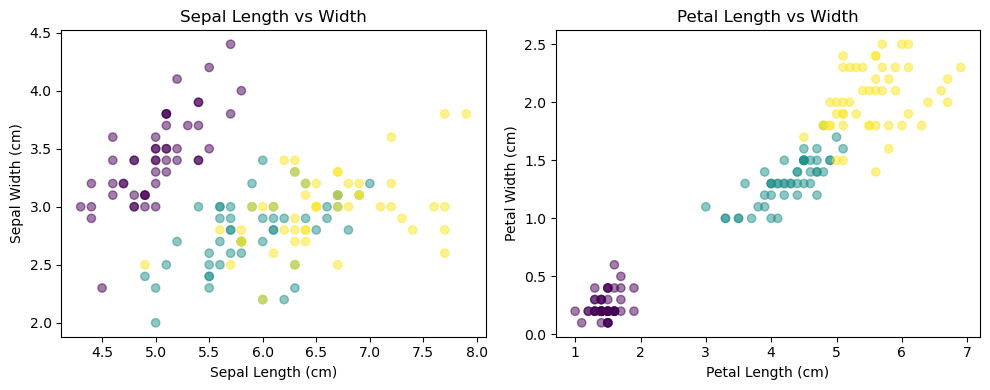

In [29]:
# plot distribution of each feature for each species
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.scatter(df["sepal_length"], df["sepal_width"], c=df["species"].astype("category").cat.codes, cmap="viridis", alpha=0.5)
plt.title("Sepal Length vs Width")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.subplot(1, 2, 2)
plt.scatter(df["petal_length"], df["petal_width"], c=df["species"].astype("category").cat.codes, cmap="viridis", alpha=0.5)
plt.title("Petal Length vs Width")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.tight_layout()
plt.show()

Correlation Matrix:
              sepal_length  sepal_width  petal_length  petal_width   species
sepal_length      1.000000    -0.109369      0.871754     0.817954  0.782561
sepal_width      -0.109369     1.000000     -0.420516    -0.356544 -0.419446
petal_length      0.871754    -0.420516      1.000000     0.962757  0.949043
petal_width       0.817954    -0.356544      0.962757     1.000000  0.956464
species           0.782561    -0.419446      0.949043     0.956464  1.000000


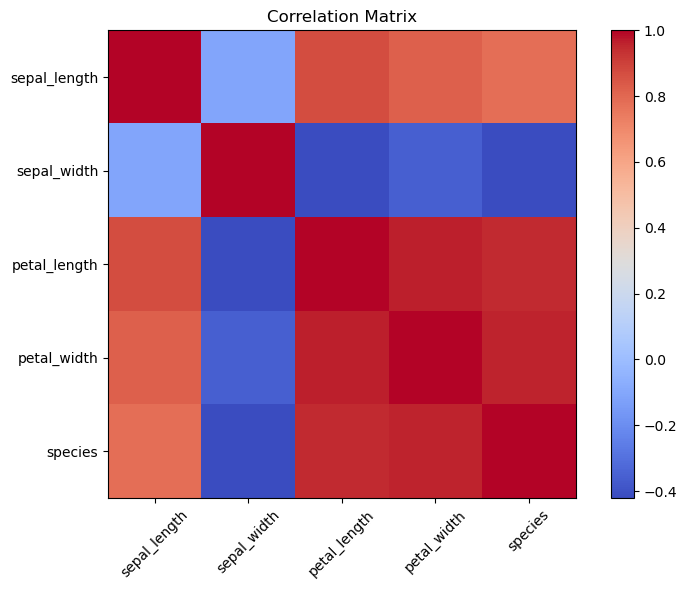

In [30]:
# convert species to numeric codes for correlation analysis
df["species"] = df["species"].astype("category").cat.codes
# calculate correlation matrix
correlation_matrix = df.corr()
# print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# plot correlation matrix
plt.figure(figsize=(8, 6))
plt.title("Correlation Matrix")
plt.imshow(correlation_matrix, cmap="coolwarm", interpolation="nearest")
plt.colorbar()
plt.xticks(range(len(df.columns)), df.columns, rotation=45)
plt.yticks(range(len(df.columns)), df.columns)
plt.tight_layout()
plt.show()